In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [730]:
#Reading train and test dataset
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [731]:
print(f'shape of Train data {df_train.shape}')
print(f'shape of test data {df_test.shape}')

shape of Train data (614, 13)
shape of test data (367, 12)


In [732]:
#Concatenating train and test for cleaning and EDA
df=pd.concat([df_train,df_test],ignore_index=True)
print(f'shape of final dataframe {df.shape}')

shape of final dataframe (981, 13)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [733]:
df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [734]:
#Checking missing values percentage for each column
df.isnull().sum()/df.shape[0]

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Credit_History       0.080530
Dependents           0.025484
Education            0.000000
Gender               0.024465
LoanAmount           0.027523
Loan_Amount_Term     0.020387
Loan_ID              0.000000
Loan_Status          0.374108
Married              0.003058
Property_Area        0.000000
Self_Employed        0.056065
dtype: float64

In [735]:
#Above we can see the percentage of missing values is very less ie within 10% for all the columns
#we can impute the missing values with median (continuous) or mode(categorical) or bfill/ffill method(>)
df.Credit_History=df.Credit_History.fillna(method='bfill')

In [736]:
df.Dependents.fillna(value=df.Dependents.mode()[0],inplace=True)

In [737]:
df.Gender.fillna(value=df.Gender.mode()[0],inplace=True)

In [738]:
df.LoanAmount.fillna(value=df.LoanAmount.median(),inplace=True)

In [739]:
df.Loan_Amount_Term.fillna(value=df.Loan_Amount_Term.mode()[0],inplace=True)

In [740]:
df.Married.fillna(value=df.Married.mode()[0],inplace=True)

In [741]:
df.Self_Employed.fillna(value=df.Self_Employed.mode()[0],inplace=True)

In [742]:
df.isnull().sum()/df.shape[0]

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Credit_History       0.000000
Dependents           0.000000
Education            0.000000
Gender               0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Loan_ID              0.000000
Loan_Status          0.374108
Married              0.000000
Property_Area        0.000000
Self_Employed        0.000000
dtype: float64

In [743]:
# All null values have been imputed

## EDA

## Univariate Analysis

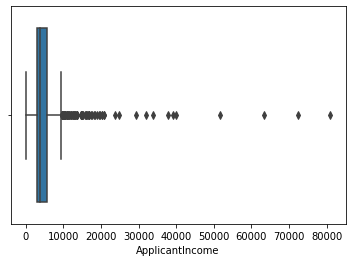

In [744]:
sns.boxplot(df.ApplicantIncome)
plt.show()

# We can clearly see large number of outliers and same is expected as we know wealth is never distributed equally
#and if we go by parito rule,80% wealth  is in hands of 20% people



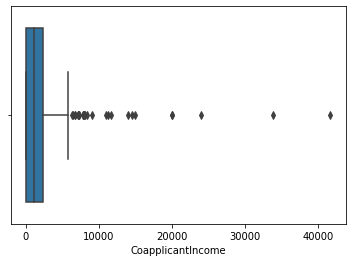

In [745]:
sns.boxplot(df.CoapplicantIncome)
plt.show()

# Coapplicant income distribution is same as applicant income. Highly positively skewed

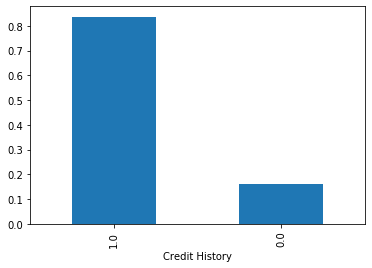

In [746]:
df.Credit_History.value_counts(1).plot.bar()
plt.xlabel('Credit History')
plt.show()
#More than 80% of applicants in dataset meet credit guidelines which increases their chances of getting loan

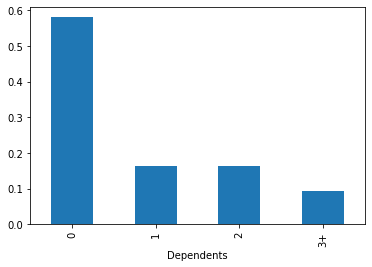

In [747]:
df.Dependents.value_counts(1).plot.bar()
plt.xlabel('Dependents')
plt.show()
# Close to 60% applicants have no dependents. This increases their chance of repayment of loan

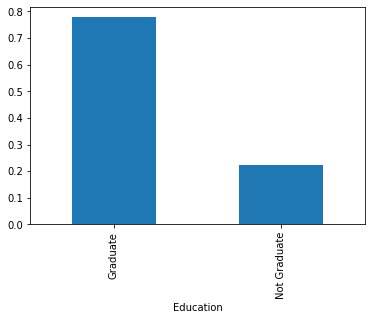

In [748]:
df.Education.value_counts(1).plot.bar()
plt.xlabel('Education')
plt.show()

#Almost 80 % applicants who applied for Loan are Graduate and it can be said loan from banks is preferred choice for educated
#whereas uneducated people or with less education level still prefer lending money from friends and other people

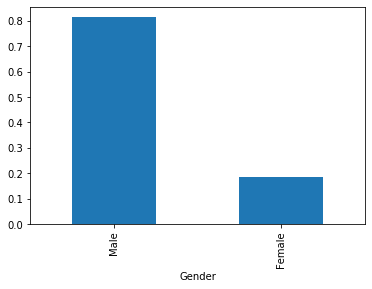

In [749]:
df.Gender.value_counts(1).plot.bar()
plt.xlabel('Gender')
plt.show()

#Around 80% applicants in dataset are male

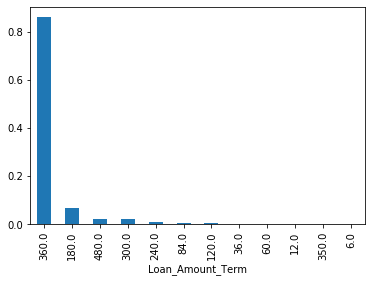

In [750]:
df.Loan_Amount_Term.value_counts(1).plot.bar()
plt.xlabel('Loan_Amount_Term')
plt.show()

#almost 85% applicants have taken loan for 30 years which clearly shows its a house loan dataset

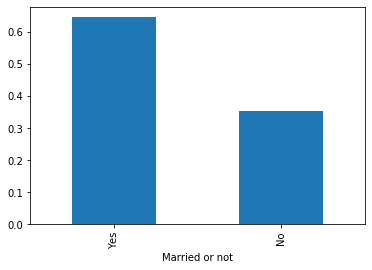

In [751]:
df.Married.value_counts(1).plot.bar()
plt.xlabel('Married or not')
plt.show()
#Married people are in more need of loan as they are planning to settle down and would not prefer rented accomodation

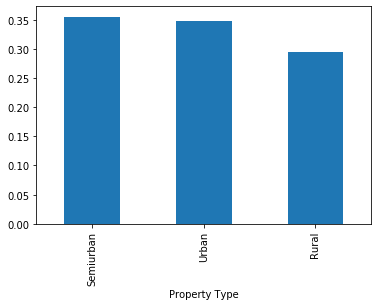

In [752]:
df.Property_Area.value_counts(1).plot.bar()
plt.xlabel('Property Type')
plt.show()

# % applicants from semi urban and urban is almost same and a little less for rural area

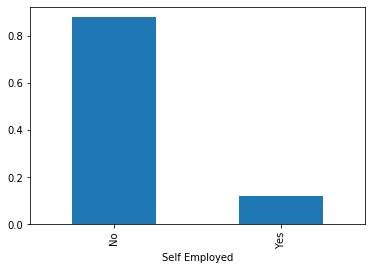

In [753]:
df.Self_Employed.value_counts(1).plot.bar()
plt.xlabel('Self Employed')
plt.show()

# More than 80 % of the applicants are not self employed 

## Bivariate Analysis

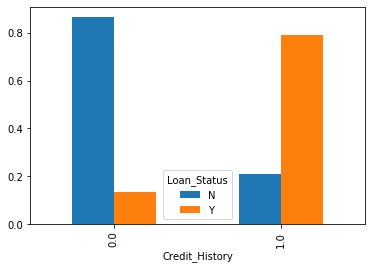

In [754]:
pd.crosstab(df.Credit_History,df.Loan_Status,normalize='index').plot.bar()
# Here we can see credit history being a significant factor for getting loan
# Applicants not following credit guidelines have high rejection rate and those following credit guidelines 
# have very low rejection rate

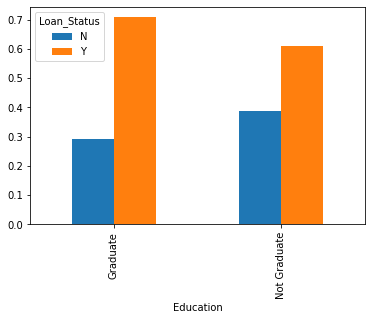

In [755]:
pd.crosstab(df.Education,df.Loan_Status,normalize='index').plot.bar()
#Clearly applicants with lower education level have high rejection rate

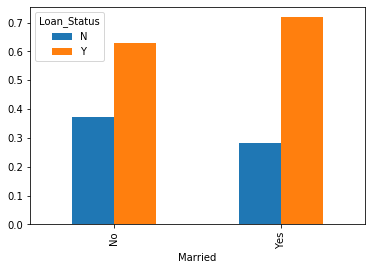

In [756]:
pd.crosstab(df.Married,df.Loan_Status,normalize='index').plot.bar()
#unmarried people have high rejection rate

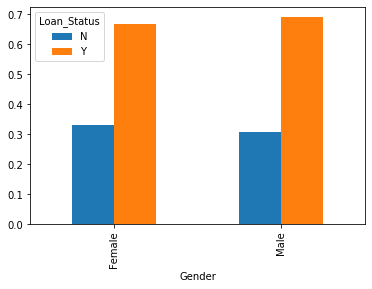

In [757]:
pd.crosstab(df.Gender,df.Loan_Status,normalize='index').plot.bar()
#We can say here rejection and acceptance of loan application is unbiased of gender
#So gender is not a significant feature for prediction

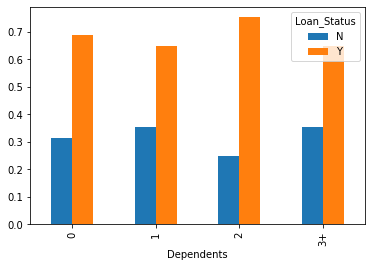

In [758]:
pd.crosstab(df.Dependents,df.Loan_Status,normalize='index').plot.bar()

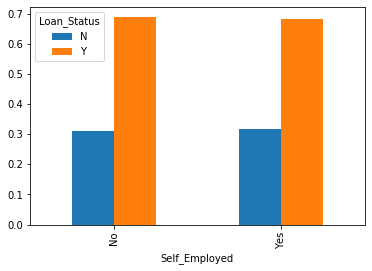

In [760]:
pd.crosstab(df.Self_Employed,df.Loan_Status,normalize='index').plot.bar()
#Acceptance and rejection is not affected as per employment status so it is not a significant feature

In [761]:
#Checking target class
df.Loan_Status.value_counts(1)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [762]:
#Checking categorical and numerical columns
print(df.select_dtypes('object').columns)

Index(['Dependents', 'Education', 'Gender', 'Loan_ID', 'Loan_Status',
       'Married', 'Property_Area', 'Self_Employed'],
      dtype='object')


In [763]:
print(df.select_dtypes('number').columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')


In [764]:
#Converting categorical columns to numeric for model
#df.Education.value_counts()
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})

In [765]:
df.Gender.value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [766]:
df.Gender=df.Gender.map({'Male':1,'Female':0})

In [767]:
df.Married.value_counts()

Yes    634
No     347
Name: Married, dtype: int64

In [768]:
df.Married=df.Married.map({'Yes':1,'No':0})

In [769]:
df.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [770]:
#Applying One hot encoding for Property area as it is a nominal column with more than 2 subcategories
df=pd.get_dummies(df,columns=['Property_Area'],drop_first=True,prefix='Prop_')

In [771]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})

In [772]:
df.Dependents=df.Dependents.replace({'3+':3})

In [773]:
df.Dependents=df.Dependents.astype(np.int32)

In [774]:
df.Loan_Status=df.Loan_Status.replace({'Y':1,'N':0})

In [775]:
df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Self_Employed,Prop__Semiurban,Prop__Urban
0,5849,0.0,1.0,0,1,1,126.0,360.0,LP001002,1.0,0,0,0,1
1,4583,1508.0,1.0,1,1,1,128.0,360.0,LP001003,0.0,1,0,0,0
2,3000,0.0,1.0,0,1,1,66.0,360.0,LP001005,1.0,1,1,0,1
3,2583,2358.0,1.0,0,0,1,120.0,360.0,LP001006,1.0,1,0,0,1
4,6000,0.0,1.0,0,1,1,141.0,360.0,LP001008,1.0,0,0,0,1


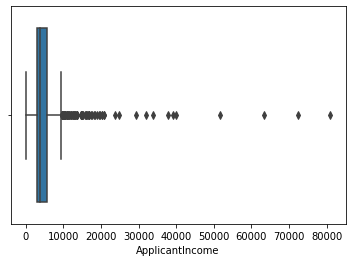

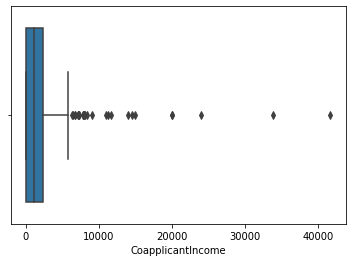

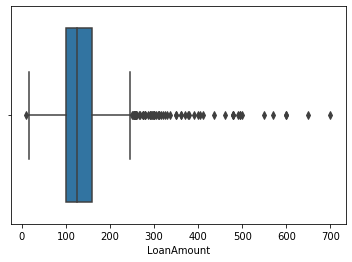

In [776]:
#Checking Outliers
for i in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    sns.boxplot(df[i])
    plt.show()

In [777]:
#adding 1 to columns to make data points >=0
for i in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    if(min(df[i])<=0):
        df[i]=df[i]+1

In [778]:
#Using boxcox transformation to treat outliers
from scipy.stats import boxcox
for i in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    df[i]=boxcox(df[i])[0]

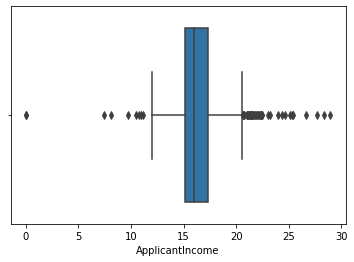

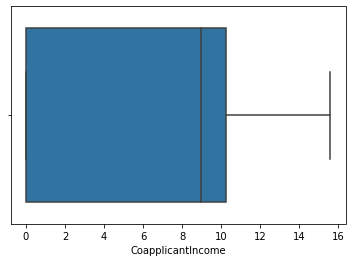

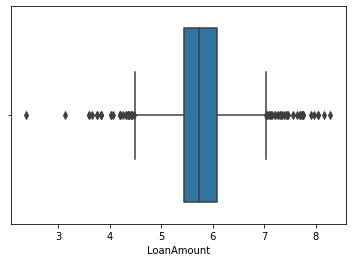

In [779]:
#Checking distribution after boxplot
for i in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    sns.boxplot(df[i])
    plt.show()

## MultiCollinearity

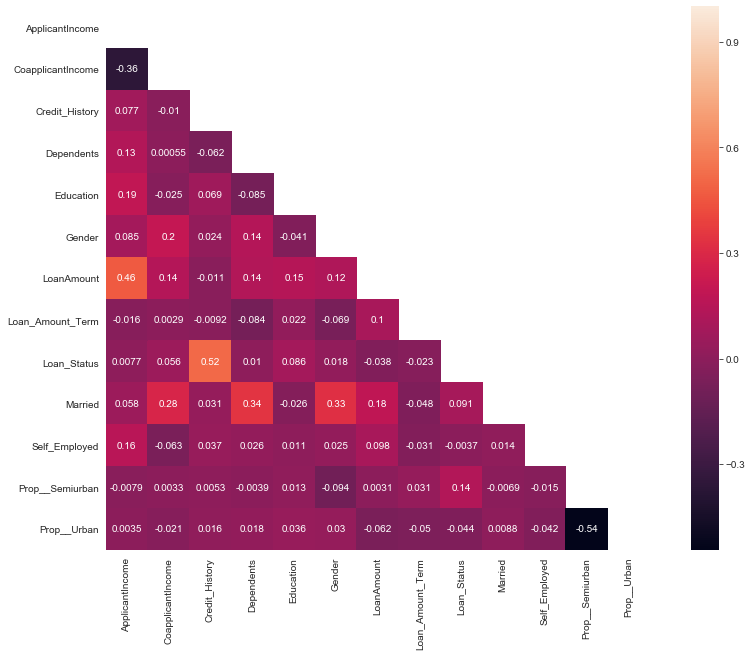

In [780]:
plt.figure(figsize=(15,10))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True)
    plt.show()

In [781]:
#There doesnt seem to be  any multi collinearity bw columns
#Credit History has high correlation with target so it seems to be a significant feature

## Building Model without feature extraction

In [782]:
#Dividing features and target variable
x=df.drop(columns=['Loan_Status','Loan_ID'])
y=df.Loan_Status

#Splitting dataframe back into train and test
x_train=x.iloc[:614,:]
x_test=x.iloc[614:,:]

y_train=df.iloc[:614,9:10]

y_train.shape

from sklearn.linear_model import LogisticRegression

In [783]:
lr=LogisticRegression(fit_intercept=True,max_iter=1000)
lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [784]:
cross_val_score(lr,x_train,np.ravel(y_train),cv=10,scoring='accuracy').mean()

0.7998149127445795

In [785]:
y_pred=lr.predict(x_test)

In [786]:
y_pred.shape

(367,)

In [787]:
output=pd.DataFrame({'Loan_ID':df_test.Loan_ID,'Loan_Status':y_pred})

In [788]:
output.Loan_Status=output.Loan_Status.map({1:'Y',0:'N'})

In [789]:
output.to_csv('submission.csv',index=False)

## Feature Extraction
<ol>
<li>Feature extraction would reduce the dimensionality and make the model computationally better
<li>Total income and EMI is a better feature w.r.t to target(Loan Status) in comparison to individual separated columns

In [790]:
df['Total_Income']=df.ApplicantIncome+df.CoapplicantIncome
df['EMI']=df.LoanAmount/df.Loan_Amount_Term

In [791]:
#Dropping old columns and Gender,Self_Employed columns as well
df.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Gender','Self_Employed'],inplace=True)
df.shape

(981, 10)

In [794]:
#Dividing features and target variable
x=df.drop(columns=['Loan_Status','Loan_ID'])
y=df.Loan_Status



In [799]:
#Splitting dataframe back into train and test
x_train=x.iloc[:614,:]
x_test=x.iloc[614:,:]

y_train=df.iloc[:614,4:5]

## Building Logistic Regression Model after Feature Extraction

In [813]:
log=LogisticRegression(fit_intercept=True,max_iter=100)
log.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [814]:
from sklearn.model_selection import cross_val_score

In [815]:
cross_val_score(log,x_train,np.ravel(y_train),cv=3,scoring='accuracy').mean()

0.8013470428821936

In [816]:
y_pred=log.predict(x_test)

In [817]:
y_pred.shape

(367,)

In [818]:
output=pd.DataFrame({'Loan_ID':df_test.Loan_ID,'Loan_Status':y_pred})

In [819]:
output.Loan_Status=output.Loan_Status.map({1:'Y',0:'N'})

In [820]:
output.to_csv('submission.csv',index=False)

## Applying Tree based Models

In [809]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import lightgbm as lgbm

In [810]:
Classifier=[]

In [811]:
lgb=lgbm.LGBMClassifier()
Classifier.append(lgb)

rf=RandomForestClassifier()
Classifier.append(rf)

dtree=DecisionTreeClassifier()
Classifier.append(dtree)

xgb=xgboost.XGBClassifier()
Classifier.append(xgb)



In [812]:
for i in Classifier:
    print(f'Model {i}')
    i.fit(x_train,y_train)
    print('\n')
    print(f'Accuracy of train {cross_val_score(i,x_train,np.ravel(y_train),cv=3,scoring="accuracy").mean()}')
    print('\n')

Model LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)




D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of train 0.7508130081300813


Model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until




Accuracy of train 0.7557229395823369


Model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy of train 0.7085126733620277


Model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Accuracy of train 0.7687709230033476




In [578]:
y_pred=xgb.predict(x_test)

y_pred.shape

output=pd.DataFrame({'Loan_ID':df_test.Loan_ID,'Loan_Status':y_pred})

output.Loan_Status=output.Loan_Status.map({1:'Y',0:'N'})

output.to_csv('submission.csv',index=False)